In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'model' is not defined

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d trash_dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 738MB/s]
Archive:  trash-type-image-dataset.zip
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: trash_dataset/TrashType_Image_Dataset/cardb

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

sample_folder = '/content/trash_dataset/dataset/training/plastic'  # You can change "plastic" to "paper", "glass", etc.

images = glob.glob(sample_folder + '/*.jpg')

plt.figure(figsize=(12, 6))
for i in range(5):
    img = mpimg.imread(images[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


IndexError: list index out of range

<Figure size 1200x600 with 0 Axes>

Found 403 images in folder.


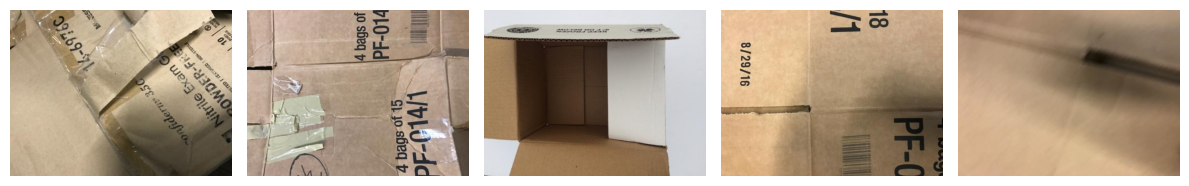

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

# Set correct path to any class folder (e.g., cardboard, glass, metal, etc.)
folder_path = '/content/trash_dataset/TrashType_Image_Dataset/cardboard'

# Support all image extensions
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
images = []
for ext in image_extensions:
    images.extend(glob.glob(os.path.join(folder_path, ext)))

print(f"Found {len(images)} images in folder.")

# Show up to 5 images
plt.figure(figsize=(12, 6))
for i in range(min(5, len(images))):
    img = mpimg.imread(images[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

data_path = '/content/trash_dataset/TrashType_Image_Dataset'

# Split 80% for training, 20% for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base EfficientNetV2B2 without top layer
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model (do not train its layers)
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

# Build the final model
model = Model(inputs=base_model.input, outputs=output)



35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# 🔧 Unfreeze top 20 layers of EfficientNetV2B2 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2
)


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.1592 - loss: 1.8112 - val_accuracy: 0.2346 - val_loss: 1.7288
Epoch 2/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.1862 - loss: 1.7520 - val_accuracy: 0.2346 - val_loss: 1.7226


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open trash-type-image-dataset.zip, trash-type-image-dataset.zip.zip or trash-type-image-dataset.zip.ZIP.


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.08GB/s]
Archive:  trash-type-image-dataset.zip
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/card

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.2017 - loss: 1.7945 - val_accuracy: 0.2346 - val_loss: 1.7273
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.2060 - loss: 1.7415 - val_accuracy: 0.2346 - val_loss: 1.7231
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.2130 - loss: 1.7272 - val_accuracy: 0.2346 - val_loss: 1.7220
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.2116 - loss: 1.7330 - val_accuracy: 0.2346 - val_loss: 1.7212
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.2187 - loss: 1.7333 - val_accuracy: 0.2346 - val_loss: 1.7208
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.2489 - loss: 1.7424 - val_accuracy: 0.2346 - val_loss: 1.7198
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.2182 - loss: 1.7344 - val_accuracy: 0.2346 - val_loss: 1.7191
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.2401 - loss: 1.7442 - val_accuracy: 0.2346 - v

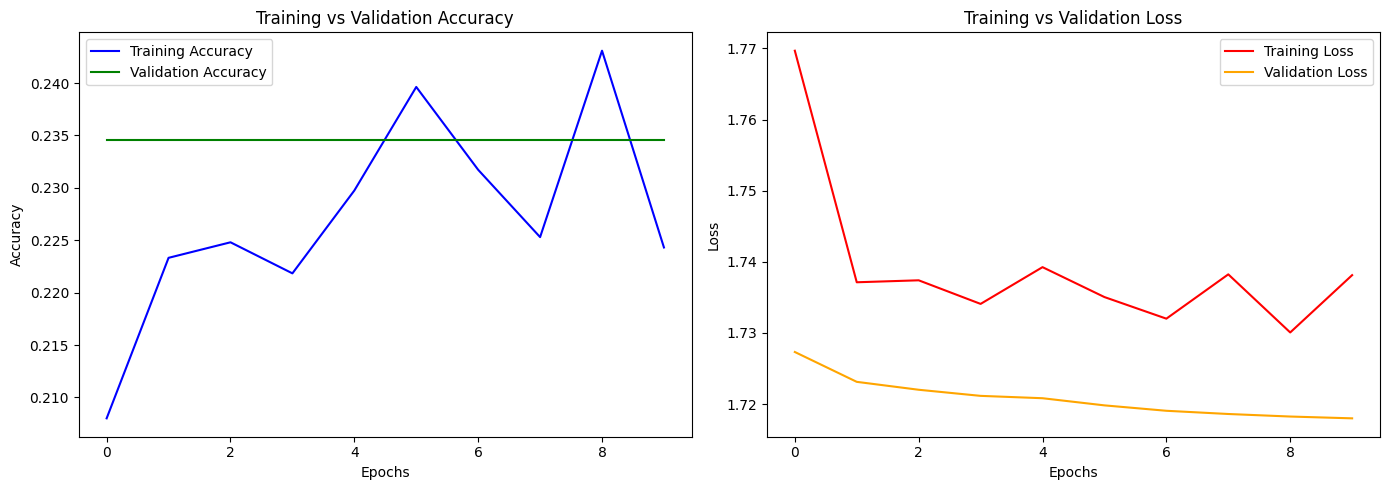

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# 🔵 Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 🔴 Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open trash-type-image-dataset.zip, trash-type-image-dataset.zip.zip or trash-type-image-dataset.zip.ZIP.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [ ]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open trash-type-image-dataset.zip, trash-type-image-dataset.zip.zip or trash-type-image-dataset.zip.ZIP.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()

# Class mapping
class_names = list(train_gen.class_indices.keys())
tips = {
    'plastic': "♻️ Avoid single-use plastics. Recycle bottles properly!",
    'paper': "📄 Recycle newspapers and notebooks. Save trees!",
    'metal': "🧃 Clean and recycle metal cans and foil.",
    'glass': "🍾 Reuse glass jars or recycle them carefully.",
    'cardboard': "📦 Flatten boxes before recycling.",
    'trash': "🚮 Segregate non-recyclables responsibly."
}

for img_path in uploaded.keys():
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Show image + prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

    print(f"🗑️ Predicted Class: {predicted_class}")
    print(f"🌱 Eco-Tip: {tips[predicted_class]}")


Saving Screenshot 2025-07-06 032526.png to Screenshot 2025-07-06 032526.png


NameError: name 'train_gen' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess uploaded image
img_path = '/content/Screenshot 2025-07-06 032526.png'  # replace with your uploaded image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Manually define class names
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define eco-tips for each class
tips = {
    'cardboard': "📦 Reuse boxes for storage or recycle clean ones!",
    'glass': "🍾 Rinse and recycle glass separately. Avoid breaking them.",
    'metal': "🛢️ Rinse cans and recycle. Avoid sharp edges.",
    'paper': "📄 Reuse one-sided paper. Recycle clean paper only.",
    'plastic': "♻️ Avoid single-use plastics. Recycle bottles properly!",
    'trash': "🚯 Reduce waste. Try composting or upcycling."
}

# Predict the class
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Show the image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f'🔍 Predicted: {predicted_class}')
plt.show()

# Show predicted class and eco-tip
print(f"🗑️ Predicted Class: {predicted_class}")
print(f"🌿 Eco-Tip: {tips[predicted_class]}")


NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base EfficientNetV2B2 without top layer
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


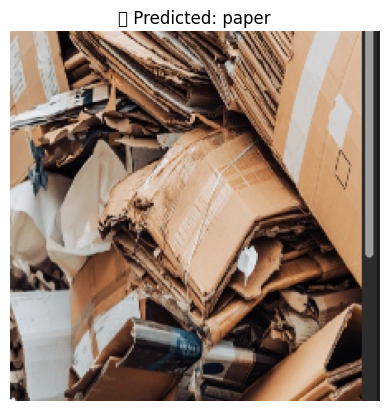

🗑️ Predicted Class: paper
🌿 Eco-Tip: 📄 Reuse one-sided paper. Recycle clean paper only.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the uploaded image
img_path = '/content/Screenshot 2025-07-06 032526.png'  # change if needed
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Class names (manually defined)
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Eco tips
tips = {
    'cardboard': "📦 Reuse boxes for storage or recycle clean ones!",
    'glass': "🍾 Rinse and recycle glass separately. Avoid breaking them.",
    'metal': "🛢️ Rinse cans and recycle. Avoid sharp edges.",
    'paper': "📄 Reuse one-sided paper. Recycle clean paper only.",
    'plastic': "♻️ Avoid single-use plastics. Recycle bottles properly!",
    'trash': "🚯 Reduce waste. Try composting or upcycling."
}

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

# Display image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f'🔍 Predicted: {predicted_class}')
plt.show()

print(f"🗑️ Predicted Class: {predicted_class}")
print(f"🌿 Eco-Tip: {tips[predicted_class]}")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-07-06 033328.png to Screenshot 2025-07-06 033328.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


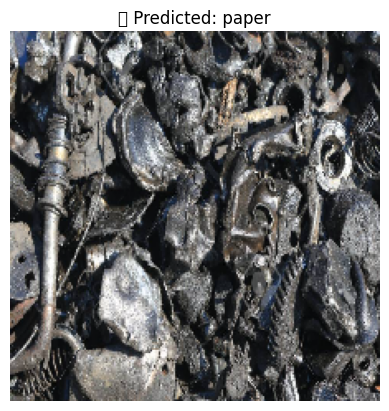

🗑️ Predicted Class: paper
🌱 Eco-Tip: 📄 Reuse one-sided paper. Recycle clean paper only.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Replace this line if class_names or tips not already defined:
# class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Loop through uploaded images
for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Show the image and result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"🔍 Predicted: {predicted_class}")
    plt.show()

    print(f"🗑️ Predicted Class: {predicted_class}")
    print(f"🌱 Eco-Tip: {tips[predicted_class]}")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-07-06 033328.png to Screenshot 2025-07-06 033328 (1).png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [ ]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

tips = {
    'cardboard': "📦 Flatten boxes before recycling. Remove any tape or labels.",
    'glass': "🧴 Rinse glass containers. Do not break them before recycling.",
    'metal': "🥫 Rinse cans and remove labels if possible.",
    'paper': "📄 Reuse one-sided paper. Recycle clean paper only.",
    'plastic': "♻️ Avoid single-use plastics. Recycle bottles properly!",
    'trash': "🚯 Reduce your waste. Choose reusable options!"
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


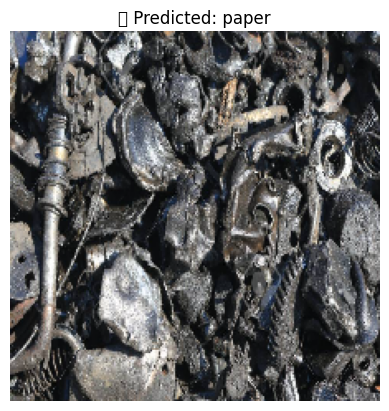

🧠 Predicted Class: paper
🌱 Eco-Tip: 📄 Reuse one-sided paper. Recycle clean paper only.


In [ ]:
# ✅ Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ✅ Step 2: Class names and eco-tips
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

tips = {
    'cardboard': "📦 Flatten boxes before recycling. Remove any tape or labels.",
    'glass': "🧴 Rinse glass containers. Do not break them before recycling.",
    'metal': "🥫 Rinse cans and remove labels if possible.",
    'paper': "📄 Reuse one-sided paper. Recycle clean paper only.",
    'plastic': "♻️ Avoid single-use plastics. Recycle bottles properly!",
    'trash': "🚯 Reduce your waste. Choose reusable options!"
}

# ✅ Step 3: Load the uploaded image
img_path = "Screenshot 2025-07-06 033328.png"  # Your file name
img = image.load_img(img_path, target_size=(224, 224))  # Resize

# ✅ Step 4: Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# ✅ Step 5: Predict the class
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# ✅ Step 6: Display image and result
plt.imshow(img)
plt.axis('off')
plt.title(f"🧠 Predicted: {predicted_class}")
plt.show()

print(f"🧠 Predicted Class: {predicted_class}")
print(f"🌱 Eco-Tip: {tips[predicted_class]}")


In [ ]:
# 🔓 Unfreeze top 50 layers
for layer in base_model.layers[-50:]:
    layer.trainable = True


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# 👇 Replace the path if your dataset folder is different
train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload kaggle.json again


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhavinijoshi","key":"d04c090f1aabc243b7a3294b818aecea"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download & unzip the dataset
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.14GB/s]
Archive:  trash-type-image-dataset.zip
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/card

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base EfficientNetV2B2 without top layer
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 304s 4s/step - accuracy: 0.2143 - loss: 1.7686 - val_accuracy: 0.1928 - val_loss: 1.7426
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step - accuracy: 0.2237 - loss: 1.7339 - val_accuracy: 0.2485 - val_loss: 1.7195
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.2067 - loss: 1.7401 - val_accuracy: 0.2346 - val_loss: 1.7144
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.2143 - loss: 1.7488 - val_accuracy: 0.2366 - val_loss: 1.7263
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.2165 - loss: 1.7378 - val_accuracy: 0.2346 - val_loss: 1.7424
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.2417 - loss: 1.7429 - val_accuracy: 0.2346 - val_loss: 1.7215
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.2466 - loss: 1.7309 - val_accuracy: 0.2326 - val_loss: 1.7268
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.2191 - loss: 1.7387 - val_accuracy: 0.1710 - v

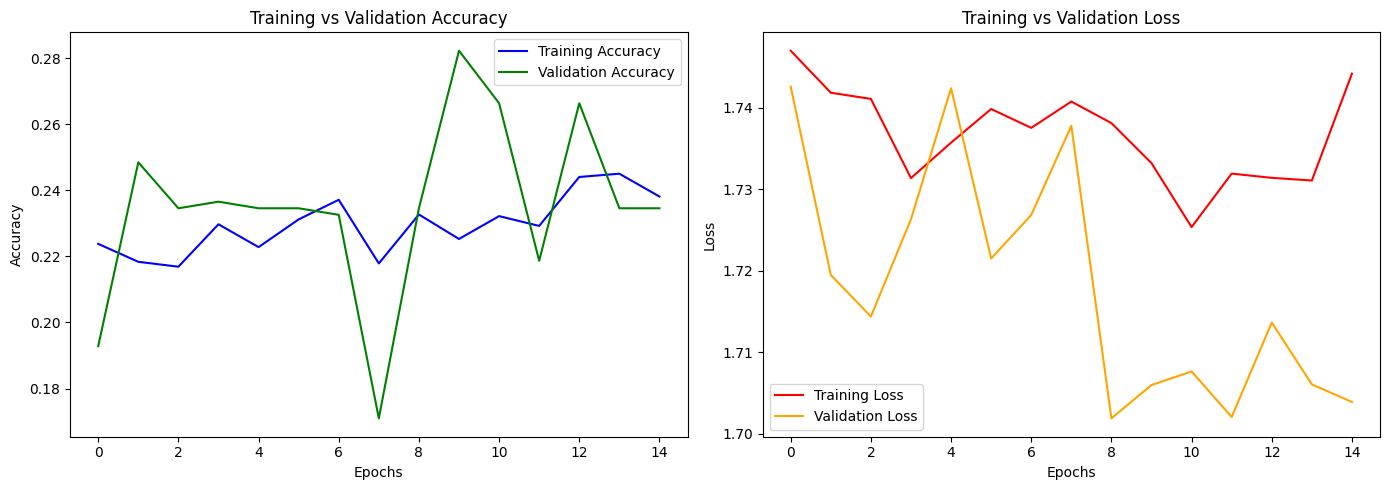

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# 🔵 Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 🔴 Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


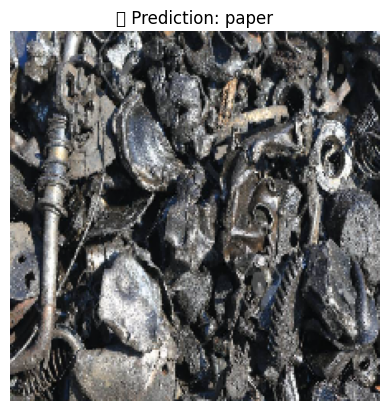

🧠 Predicted Class: paper
🌱 Eco Tip: 📄 Recycle clean paper only. Avoid waxy or wet paper.
📦 Disposal Advice: 📥 Put in dry waste bin. Avoid mixing with wet garbage.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Classes (in order of training folders)
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Eco tips for each category
eco_tips = {
    'cardboard': "📦 Flatten boxes before recycling. Remove tape and labels.",
    'glass': "🧴 Rinse glass bottles. Don’t break them before recycling.",
    'metal': "🥫 Rinse cans. Avoid mixing with other waste.",
    'paper': "📄 Recycle clean paper only. Avoid waxy or wet paper.",
    'plastic': "♻️ Avoid single-use plastics. Reuse whenever possible.",
    'trash': "🚯 Try to reduce non-recyclable waste by switching to reusables."
}

# Disposal advice (your unique value addition)
disposal = {
    'cardboard': "🗑️ Place in dry recyclable bin or give to scrap collector.",
    'glass': "🔄 Drop at glass-specific recycling bins or centers.",
    'metal': "🏭 Take to a metal recycling facility or dry waste collector.",
    'paper': "📥 Put in dry waste bin. Avoid mixing with wet garbage.",
    'plastic': "🚮 Use plastic collection drives or blue bin.",
    'trash': "❌ Cannot be recycled. Dispose responsibly in general bin."
}

# 📂 Load your test image
img_path = "Screenshot 2025-07-06 033328.png"  # Change if your image name is different
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

# 🧠 Predict
pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]

# 📊 Display prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"🧠 Prediction: {pred_class}")
plt.show()

# ✅ Print result and tips
print(f"🧠 Predicted Class: {pred_class}")
print(f"🌱 Eco Tip: {eco_tips[pred_class]}")
print(f"📦 Disposal Advice: {disposal[pred_class]}")


In [ ]:
base_model.trainable = True


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_gen, validation_data=val_gen, epochs=10)


NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model without top
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# 🔓 Unfreeze all layers
base_model.trainable = True

# Add classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation + rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training set
train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',  # update if your path is different
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation set
val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',  # update if your path is different
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/  # assuming you've already uploaded kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d farzadnekouei/trash-type-image-dataset


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/  # assuming you've already uploaded kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d farzadnekouei/trash-type-image-dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.24GB/s]


In [ ]:
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Archive:  trash-type-image-dataset.zip
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_010.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/c

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load EfficientNetV2B2 base (without top layer)
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Unfreeze ALL layers for fine-tuning
base_model.trainable = True

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 803s 11s/step - accuracy: 0.1718 - loss: 1.8416 - val_accuracy: 0.2247 - val_loss: 1.7472
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 706s 11s/step - accuracy: 0.2900 - loss: 1.7044 - val_accuracy: 0.3698 - val_loss: 1.6259
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 709s 11s/step - accuracy: 0.3788 - loss: 1.6153 - val_accuracy: 0.4811 - val_loss: 1.5555
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 746s 12s/step - accuracy: 0.4678 - loss: 1.5117 - val_accuracy: 0.4911 - val_loss: 1.4247
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 708s 11s/step - accuracy: 0.4769 - loss: 1.4442 - val_accuracy: 0.5865 - val_loss: 1.3380
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 781s 12s/step - accuracy: 0.5460 - loss: 1.3540 - val_accuracy: 0.5865 - val_loss: 1.2595
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 709s 11s/step - accuracy: 0.5390 - loss: 1.2989 - val_accuracy: 0.5944 - val_loss: 1.2498
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 707s 11s/step - accuracy: 0.5942 - loss: 1.2194 - val_accuracy: 0.

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"bhavinijoshi","key":"d04c090f1aabc243b7a3294b818aecea"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.38GB/s]
Archive:  trash-type-image-dataset.zip
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/card

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
import tensorflow as tf
print("Detected devices:", tf.config.list_physical_devices())
print("GPU devices:", tf.config.list_physical_devices('GPU'))


Detected devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Load the base model
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Unfreeze all layers
base_model.trainable = True

# Add classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.1612 - loss: 1.8554 - val_accuracy: 0.2008 - val_loss: 1.7676
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 588ms/step - accuracy: 0.2567 - loss: 1.7363 - val_accuracy: 0.3797 - val_loss: 1.6443
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 535ms/step - accuracy: 0.3551 - loss: 1.6462 - val_accuracy: 0.4672 - val_loss: 1.5624
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.4144 - loss: 1.5805 - val_accuracy: 0.5169 - val_loss: 1.4639
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 531ms/step - accuracy: 0.4762 - loss: 1.4882 - val_accuracy: 0.5626 - val_loss: 1.3654
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 532ms/step - accuracy: 0.5240 - loss: 1.4005 - val_accuracy: 0.6123 - val_loss: 1.2677
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - accuracy: 0.5639 - loss: 1.3455 - val_accuracy: 0.5567 - val_loss: 1.3742
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 519ms/step - accuracy: 0.5855 - loss: 1.2890 - val_accura

NameError: name 'history' is not defined

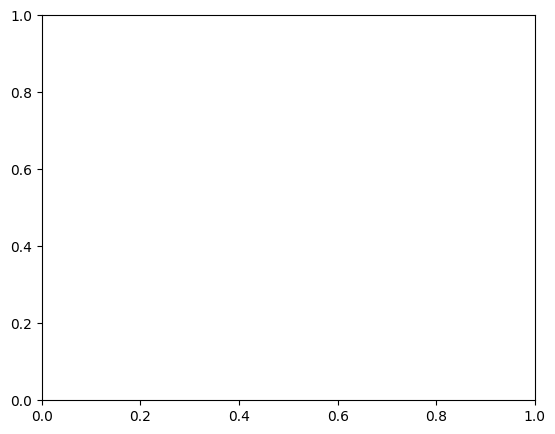

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


NameError: name 'model' is not defined

In [3]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = True  # fine-tuning

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2  # just enough to get history for graph
)


NameError: name 'train_gen' is not defined

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/trash_dataset/TrashType_Image_Dataset'

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip trash-type-image-dataset.zip -d /content/trash_dataset


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.35GB/s]
Archive:  trash-type-image-dataset.zip
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/trash_dataset/TrashType_Image_Dataset/card

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.1922 - loss: 1.8208 - val_accuracy: 0.1590 - val_loss: 1.8432
Epoch 2/2
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 531ms/step - accuracy: 0.2789 - loss: 1.7143 - val_accuracy: 0.4294 - val_loss: 1.5740


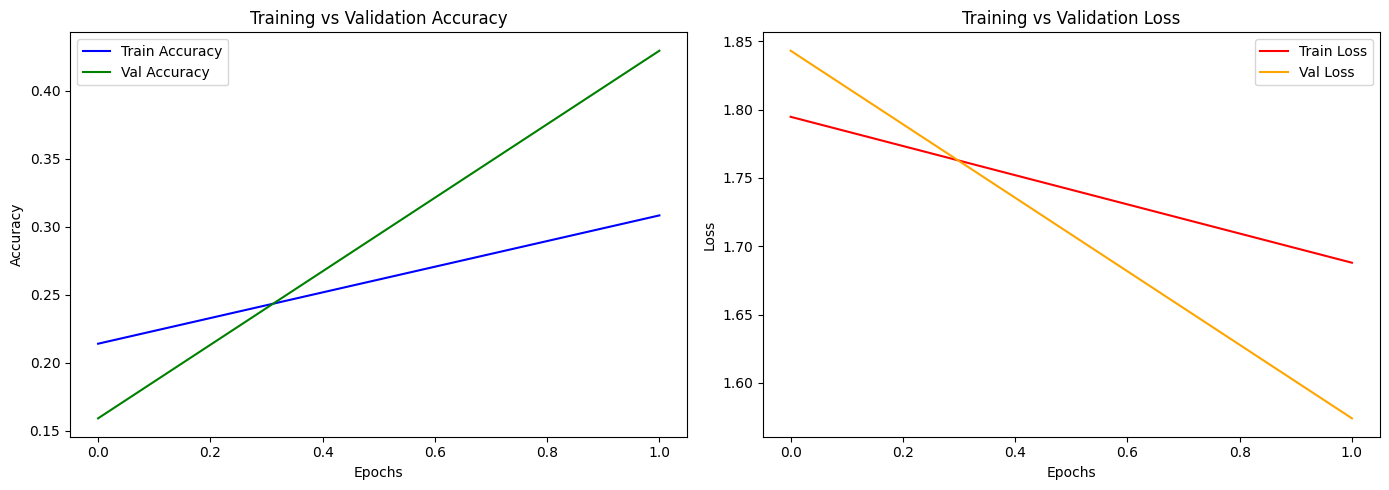

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-07-06 032526.png to Screenshot 2025-07-06 032526.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


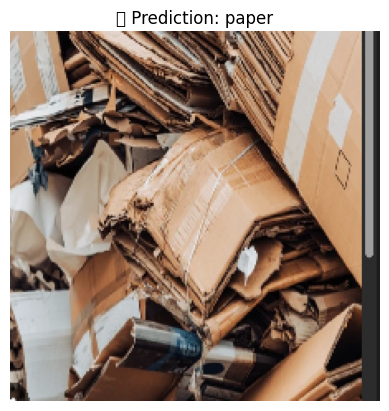

🧠 Predicted Class: paper
🌱 Eco Tip: 📄 Recycle clean, dry paper only.
🗑️ Disposal Advice: 📥 Keep separate from wet garbage.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Class labels
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Eco & disposal tips
eco_tips = {
    'cardboard': "📦 Flatten boxes before recycling.",
    'glass': "🧴 Rinse glass containers. Don’t break them.",
    'metal': "🥫 Rinse cans before disposal.",
    'paper': "📄 Recycle clean, dry paper only.",
    'plastic': "♻️ Avoid single-use plastics.",
    'trash': "🚯 Choose reusable options to reduce waste."
}

disposal = {
    'cardboard': "🗑️ Place in dry recyclable bin.",
    'glass': "🔄 Use glass-specific recycling bins.",
    'metal': "🏭 Give to dry waste or scrap collectors.",
    'paper': "📥 Keep separate from wet garbage.",
    'plastic': "🚮 Dispose through plastic drives or blue bins.",
    'trash': "❌ Dispose responsibly in general bin."
}

# Use uploaded file
img_path = "Screenshot 2025-07-06 032526.png"

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Show output
plt.imshow(img)
plt.axis('off')
plt.title(f"🧠 Prediction: {predicted_class}")
plt.show()

print(f"🧠 Predicted Class: {predicted_class}")
print(f"🌱 Eco Tip: {eco_tips[predicted_class]}")
print(f"🗑️ Disposal Advice: {disposal[predicted_class]}")


In [12]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-07-06 033328.png to Screenshot 2025-07-06 033328.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


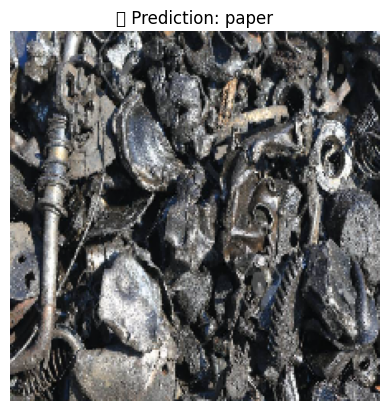

🧠 Predicted Class: paper
🌱 Eco Tip: 📄 Recycle clean, dry paper only.
🗑️ Disposal Advice: 📥 Keep separate from wet garbage.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Class names and labels
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Eco & disposal tips
eco_tips = {
    'cardboard': "📦 Flatten boxes before recycling.",
    'glass': "🧴 Rinse glass containers. Don’t break them.",
    'metal': "🥫 Rinse cans before disposal.",
    'paper': "📄 Recycle clean, dry paper only.",
    'plastic': "♻️ Avoid single-use plastics.",
    'trash': "🚯 Choose reusable options to reduce waste."
}

disposal = {
    'cardboard': "🗑️ Place in dry recyclable bin.",
    'glass': "🔄 Use glass-specific recycling bins.",
    'metal': "🏭 Give to dry waste or scrap collectors.",
    'paper': "📥 Keep separate from wet garbage.",
    'plastic': "🚮 Dispose through plastic drives or blue bins.",
    'trash': "❌ Dispose responsibly in general bin."
}

# Use the newly uploaded file
img_path = "Screenshot 2025-07-06 033328.png"

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make prediction
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Display
plt.imshow(img)
plt.axis('off')
plt.title(f"🧠 Prediction: {predicted_class}")
plt.show()

print(f"🧠 Predicted Class: {predicted_class}")
print(f"🌱 Eco Tip: {eco_tips[predicted_class]}")
print(f"🗑️ Disposal Advice: {disposal[predicted_class]}")


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    '/content/trash_dataset/TrashType_Image_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [15]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Load EfficientNetV2B2 without the top layer
base_model = EfficientNetV2B2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Fine-tune the full model
base_model.trainable = True  # Unfreeze all layers

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.2345 - loss: 1.7830 - val_accuracy: 0.1690 - val_loss: 1.8158
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.3166 - loss: 1.6746 - val_accuracy: 0.3777 - val_loss: 1.6433
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 543ms/step - accuracy: 0.3714 - loss: 1.6237 - val_accuracy: 0.4672 - val_loss: 1.5113
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 517ms/step - accuracy: 0.4679 - loss: 1.5316 - val_accuracy: 0.4771 - val_loss: 1.4579
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.4977 - loss: 1.4373 - val_accuracy: 0.5706 - val_loss: 1.3157
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 531ms/step - accuracy: 0.5302 - loss: 1.3458 - val_accuracy: 0.5686 - val_loss: 1.3226
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - accuracy: 0.5555 - loss: 1.2869 - val_accuracy: 0.6382 - val_loss: 1.1416
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 38s 601ms/step - accuracy: 0.5713 - loss: 1.2375 - val_accura

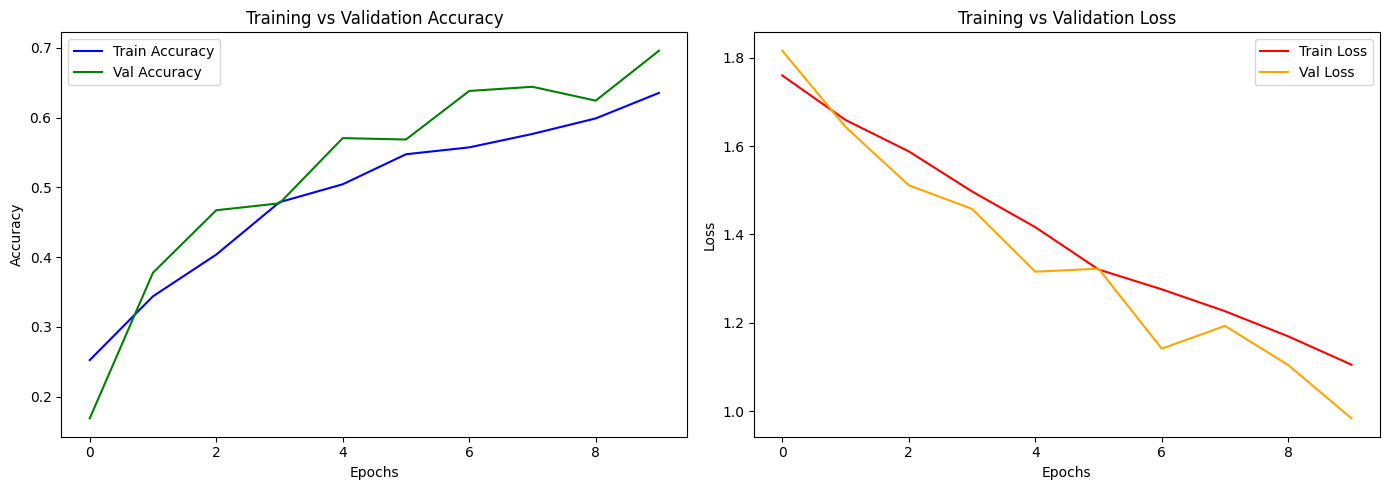

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-07-06 033328.png to Screenshot 2025-07-06 033328 (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


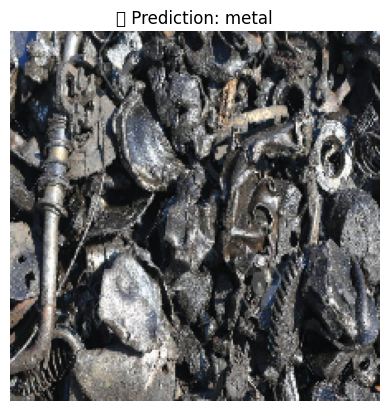

🧠 Predicted Class: metal
🌱 Eco Tip: 🥫 Rinse cans before disposal.
🗑️ Disposal Advice: 🏭 Give to dry waste or scrap collectors.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Class labels
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Eco & disposal tips
eco_tips = {
    'cardboard': "📦 Flatten boxes before recycling.",
    'glass': "🧴 Rinse glass containers. Don’t break them.",
    'metal': "🥫 Rinse cans before disposal.",
    'paper': "📄 Recycle clean, dry paper only.",
    'plastic': "♻️ Avoid single-use plastics.",
    'trash': "🚯 Choose reusable options to reduce waste."
}

disposal = {
    'cardboard': "🗑️ Place in dry recyclable bin.",
    'glass': "🔄 Use glass-specific recycling bins.",
    'metal': "🏭 Give to dry waste or scrap collectors.",
    'paper': "📥 Keep separate from wet garbage.",
    'plastic': "🚮 Dispose through plastic drives or blue bins.",
    'trash': "❌ Dispose responsibly in general bin."
}

# Use your uploaded image
img_path = "Screenshot 2025-07-06 033328 (1).png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Show the image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"🧠 Prediction: {predicted_class}")
plt.show()

print(f"🧠 Predicted Class: {predicted_class}")
print(f"🌱 Eco Tip: {eco_tips[predicted_class]}")
print(f"🗑️ Disposal Advice: {disposal[predicted_class]}")


In [20]:
model.save("garbage_classifier_final_model.h5")
